In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(101)

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
x = np.random.rand(100, 1) * 6 - 3

In [64]:
y = x**3 + 2*x + 3*x**2 + np.sin(x) + np.random.randn(100, 1) + 4

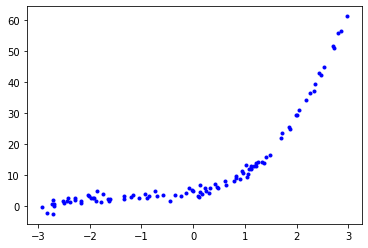

In [65]:
plt.plot(x, y, 'b.')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [67]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [68]:
X_test_poly = poly_features.fit_transform(X_test)

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X_poly, y_train)

LinearRegression()

In [71]:
lm.coef_, lm.intercept_ 

(array([[3.11491096, 2.93452938, 0.86370953]]), array([4.06249375]))

In [72]:
X_train.shape

(80, 1)

In [73]:
test_pred = lm.predict(X_test_poly)
train_pred = lm.predict(X_poly)

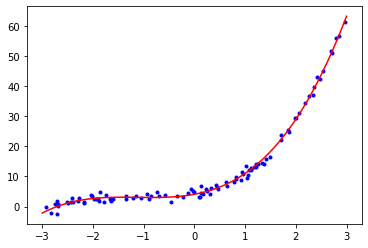

In [74]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lm.predict(X_new_poly)

plt.plot(x,y,'b.')
plt.plot(X_new,y_new, 'r-')

In [75]:
X_new_poly.shape

(100, 3)

In [76]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

RMSE 0.7376210419007423


In [77]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

RMSE 1.0221575426101936


In [78]:
rmse_test = []
rmse_train = []
z = []
for i in range (2, 100):
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    lm = LinearRegression()
    lm.fit(X_poly, y_train)
    test_pred = lm.predict(X_test_poly)
    train_pred = lm.predict(X_poly)
    rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
    z.append(i)

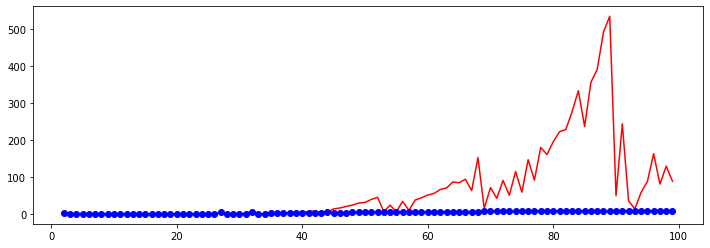

In [79]:
plt.figure(figsize=(12, 4))
plt.plot(z, rmse_test, 'r-')
plt.plot(z, rmse_train, 'b-o')

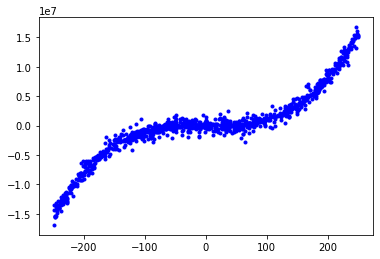

In [80]:
x1 = np.random.rand(1000, 1) * 500 - 250
y1 = x1**3 + 2*x1 + 3*x1**2 + np.sin(x1) * np.random.randn(1000, 1) * 1000000 + 4
plt.plot(x1, y1, 'b.')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=40)

In [82]:
rmse_test = []
rmse_train = []
z = []
for i in range (2, 20):
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    lm = LinearRegression()
    lm.fit(X_poly, y_train)
    test_pred = lm.predict(X_test_poly)
    train_pred = lm.predict(X_poly)
    rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
    z.append(i)

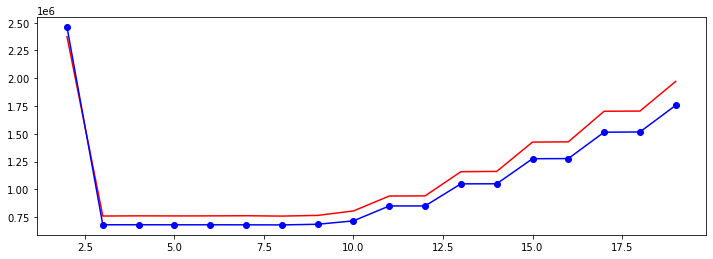

In [83]:
plt.figure(figsize=(12, 4))
plt.plot(z, rmse_test, 'r-')
plt.plot(z, rmse_train, 'b-o')